In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import scipy.stats as sst

## Data Processing

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
s2015 = pd.read_csv("File_path/2015.csv")
s2016 = pd.read_csv("File_path/2016.csv")
s2017 = pd.read_csv("File_path/2017.csv")
s2018 = pd.read_csv("File_path/2018.csv")
s2019 = pd.read_csv("File_path/2019.csv")
gcu = pd.read_csv("File_path/gc_full.csv")
areas = pd.read_csv("File_path/ProjectAreas.csv")
date15 = pd.read_csv("File_path/2015_dates")
date16 = pd.read_csv("File_path/2016_dates")
date17 = pd.read_csv("File_path/2017_dates")
date18 = pd.read_csv("File_path/2018_dates")
date19 = pd.read_csv("File_path/2019_dates")

In [4]:
s2015.dropna(inplace = True)
s2016.dropna(inplace = True)
s2017.dropna(inplace = True)
s2018.dropna(inplace = True)
s2019.dropna(inplace = True)

In [5]:
###Max_rss was calculated to be in KB and is converted to GB

s2015['max_rss'] = s2015['max_rss']/(1000000)
s2016['max_rss'] = s2016['max_rss']/(1000000)
s2017['max_rss'] = s2017['max_rss']/(1000000)
s2018['max_rss'] = s2018['max_rss']/(1000000)
s2019['max_rss'] = s2019['max_rss']/(1000000)

###stime and utime being in 2.2 ghz (1 clock tick) is converted to seconds

s2015['stime'] = s2015['stime']/(2200000000)
s2016['stime'] = s2016['stime']/(2200000000)
s2017['stime'] = s2017['stime']/(2200000000)
s2018['stime'] = s2018['stime']/(2200000000)
s2019['stime'] = s2019['stime']/(2200000000)

s2015['utime'] = s2015['utime']/(2200000000)
s2016['utime'] = s2016['utime']/(2200000000)
s2017['utime'] = s2017['utime']/(2200000000)
s2018['utime'] = s2018['utime']/(2200000000)
s2019['utime'] = s2019['utime']/(2200000000)

s2015['gpu_summem'] = s2015['gpu_summem']/(1000000000)
s2016['gpu_summem'] = s2016['gpu_summem']/(1000000000)
s2017['gpu_summem'] = s2017['gpu_summem']/(1000000000)
s2018['gpu_summem'] = s2018['gpu_summem']/(1000000000)
s2019['gpu_summem'] = s2019['gpu_summem']/(1000000000)

s2015['ttime'] = s2015['stime'] + s2015['utime']
s2016['ttime'] = s2016['stime'] + s2016['utime']
s2017['ttime'] = s2017['stime'] + s2017['utime']
s2018['ttime'] = s2018['stime'] + s2018['utime']
s2019['ttime'] = s2019['stime'] + s2019['utime']

def get_sec(x):
    x = str(x).split(' days ')
    sec = int(x[0])*86400
    t = x[1].split('.')[0]
    t = t.split(':')
    sec = sec + int(t[2]) + (int(t[1]))*60 + (int(t[0]))*3600
    return sec

x1 = pd.to_datetime(s2015['end_time']) - pd.to_datetime(s2015['start_time'])
x1 = x1.apply(lambda x: get_sec(x))

x2 = pd.to_datetime(s2016['end_time']) - pd.to_datetime(s2016['start_time'])
x2 = x2.apply(lambda x: get_sec(x))

x3 = pd.to_datetime(s2017['end_time']) - pd.to_datetime(s2017['start_time'])
x3 = x3.apply(lambda x: get_sec(x))

x4 = pd.to_datetime(s2018['end_time']) - pd.to_datetime(s2018['start_time'])
x4 = x4.apply(lambda x: get_sec(x))

x5 = pd.to_datetime(s2019['end_time']) - pd.to_datetime(s2019['start_time'])
x5 = x5.apply(lambda x: get_sec(x))

s2015['job_time'] = x1
s2016['job_time'] = x2
s2017['job_time'] = x3
s2018['job_time'] = x4
s2019['job_time'] = x5

def gpu_stat(x):
    if (x == 0):
        return 0
    elif (x == -1):
        return -1
    else:
        return 1

s2015.fillna(-1,inplace = True)
s2016.fillna(-1,inplace = True)
s2017.fillna(-1,inplace = True)
s2018.fillna(-1,inplace = True)
s2019.fillna(-1,inplace = True)

s2015["gpu_use_status"] = s2015['gpu_summem'].apply(lambda x: gpu_stat(x))
s2016["gpu_use_status"] = s2016['gpu_summem'].apply(lambda x: gpu_stat(x))
s2017["gpu_use_status"] = s2017['gpu_summem'].apply(lambda x: gpu_stat(x))
s2018["gpu_use_status"] = s2018['gpu_summem'].apply(lambda x: gpu_stat(x))
s2019["gpu_use_status"] = s2019['gpu_summem'].apply(lambda x: gpu_stat(x))


In [6]:
s2015['gpu_maxmem'] = s2015['gpu_maxmem']/(1000000000)
s2016['gpu_maxmem'] = s2016['gpu_maxmem']/(1000000000)
s2017['gpu_maxmem'] = s2017['gpu_maxmem']/(1000000000)
s2018['gpu_maxmem'] = s2018['gpu_maxmem']/(1000000000)
s2019['gpu_maxmem'] = s2019['gpu_maxmem']/(1000000000)

In [7]:
def sorf(x):
    if (x == 0):
        return 1
    else:
        return 0
s2015['sorf'] = s2015['alps_exit'].apply(sorf) 
s2016['sorf'] = s2016['alps_exit'].apply(sorf)
s2017['sorf'] = s2017['alps_exit'].apply(sorf)
s2018['sorf'] = s2018['alps_exit'].apply(sorf)
s2019['sorf'] = s2019['alps_exit'].apply(sorf)

In [8]:
s2015.drop(761605,inplace = True)
s2015 = s2015[s2015.job_time != 0]
s2015['app_cpu_usg'] = s2015['ttime']/s2015['job_time']
s2015['gpu_usg'] = s2015['gpu_secs']/s2015['job_time']

s2016 = s2016[s2016.job_time != 0]
s2016['app_cpu_usg'] = s2016['ttime']/s2016['job_time']
s2016['gpu_usg'] = s2016['gpu_secs']/s2016['job_time']

s2017.drop(2759981,inplace = True)
s2017 = s2017[s2017.job_time != 0]
s2017['app_cpu_usg'] = s2017['ttime']/s2017['job_time']
s2017['gpu_usg'] = s2017['gpu_secs']/s2017['job_time']

s2018 = s2018[s2018.job_time != 0]
s2018['app_cpu_usg'] = s2018['ttime']/s2018['job_time']
s2018['gpu_usg'] = s2018['gpu_secs']/s2018['job_time']

s2019 = s2019[s2019.job_time != 0]
s2019['app_cpu_usg'] = s2019['ttime']/s2019['job_time']
s2019['gpu_usg'] = s2019['gpu_secs']/s2019['job_time']


In [9]:
file_system_type = []
project_area = []
for i in s2015['command']:
    j = i.split("/")
    if (j[1] == 'lustre' and len(j) == 6):
        file_system_type.append(j[2])
        project_area.append(j[4].split("-")[0])
    else:
        file_system_type.append("NA")
        project_area.append("NA")
s2015["file_system"] = file_system_type
s2015["projArea"] = project_area
s2015.rename({'projArea' : 'ID'},axis = 1,inplace = True)
s2015 = s2015.merge(areas,how = "left",on = "ID")
s2015.fillna(-1,inplace = True)

t25_15 = s2015[s2015.job_time <= 2]
t50_15 = s2015[s2015.job_time > 2]
t50_15 = t50_15[t50_15.job_time <= 12]
t75_15 = s2015[s2015.job_time > 12]
t75_15 = t75_15[t75_15.job_time <= 685]
t100_15 = s2015[s2015.job_time > 685]

In [10]:
file_system_type = []
project_area = []
for i in s2016['command']:
    j = i.split("/")
    if (j[1] == 'lustre' and len(j) == 6):
        file_system_type.append(j[2])
        project_area.append(j[4].split("-")[0])
    else:
        file_system_type.append("NA")
        project_area.append("NA")
s2016["file_system"] = file_system_type
s2016["projArea"] = project_area
s2016.rename({'projArea' : 'ID'},axis = 1,inplace = True)
s2016 = s2016.merge(areas,how = "left",on = "ID")
s2016.fillna(-1,inplace = True)

t25_16 = s2016[s2016.job_time <= 3]
t50_16 = s2016[s2016.job_time > 3]
t50_16 = t50_16[t50_16.job_time <= 26]
t75_16 = s2016[s2016.job_time > 26]
t75_16 = t75_16[t75_16.job_time <= 197]
t100_16 = s2016[s2016.job_time > 197]

In [11]:
file_system_type = []
project_area = []
for i in s2017['command']:
    j = i.split("/")
    if (j[1] == 'lustre' and len(j) == 6):
        file_system_type.append(j[2])
        project_area.append(j[4].split("-")[0])
    else:
        file_system_type.append("NA")
        project_area.append("NA")
s2017["file_system"] = file_system_type
s2017["projArea"] = project_area
s2017.rename({'projArea' : 'ID'},axis = 1,inplace = True)
s2017 = s2017.merge(areas,how = "left",on = "ID")
s2017.fillna(-1,inplace = True)

t25_17 = s2017[s2017.job_time <= 1]
t50_17 = s2017[s2017.job_time > 1]
t50_17 = t50_17[t50_17.job_time <= 3]
t75_17 = s2017[s2017.job_time > 3]
t75_17 = t75_17[t75_17.job_time <= 122]
t100_17 = s2017[s2017.job_time > 122]

In [12]:
file_system_type = []
project_area = []
for i in s2018['command']:
    j = i.split("/")
    if (j[1] == 'lustre' and len(j) == 6):
        file_system_type.append(j[2])
        project_area.append(j[4].split("-")[0])
    else:
        file_system_type.append("NA")
        project_area.append("NA")
s2018["file_system"] = file_system_type
s2018["projArea"] = project_area
s2018.rename({'projArea' : 'ID'},axis = 1,inplace = True)
s2018 = s2018.merge(areas,how = "left",on = "ID")
s2018.fillna(-1,inplace = True)

t25_18 = s2018[s2018.job_time <= 5]
t50_18 = s2018[s2018.job_time > 5]
t50_18 = t50_18[t50_18.job_time <= 76]
t75_18 = s2018[s2018.job_time > 76]
t75_18 = t75_18[t75_18.job_time <= 735]
t100_18 = s2018[s2018.job_time > 735]

In [13]:
file_system_type = []
project_area = []
for i in s2019['command']:
    j = i.split("/")
    if (j[1] == 'lustre' and len(j) == 6):
        file_system_type.append(j[2])
        project_area.append(j[4].split("-")[0])
    else:
        file_system_type.append("NA")
        project_area.append("NA")
s2019["file_system"] = file_system_type
s2019["projArea"] = project_area
s2019.rename({'projArea' : 'ID'},axis = 1,inplace = True)
s2019 = s2019.merge(areas,how = "left",on = "ID")
s2019.fillna(-1,inplace = True)

t25_19 = s2019[s2019.job_time <= 6]
t50_19 = s2019[s2019.job_time > 6]
t50_19 = t50_19[t50_19.job_time <= 128]
t75_19 = s2019[s2019.job_time > 128]
t75_19 = t75_19[t75_19.job_time <= 1379]
t100_19 = s2019[s2019.job_time > 1379]


In [16]:
s2015['date'] = date15['2015']
s2017['date'] = date17['2017']
s2018['date'] = date18['2018']
s2019['date'] = date19['2019']
s2016['date'] = date16['start_time']

# Data Analytics

In [14]:
s2015.shape[0],s2016.shape[0],s2017.shape[0],s2018.shape[0],s2019.shape[0]

(1492078, 4616993, 2703973, 2339266, 1510319)

In [26]:
print(t25_15['sorf'].mean())
print(t50_15['sorf'].mean())
print(t75_15['sorf'].mean())
print(t100_15['sorf'].mean())

0.9366854181909777
0.756876421985391
0.7977408157833269
0.7206358228082264


In [23]:
s2016['alps_exit'].nunique()

105

In [13]:
s2015['core_time'] = 30*s2015['node_count']*s2015['job_time']/3600

In [28]:
s2015['u/s'] = s2015[s2015.utime != 0]['utime']/s2015[s2015.stime != 0]['stime']
s2016['u/s'] = s2016[s2016.utime != 0]['utime']/s2016[s2016.stime != 0]['stime']
s2017['u/s'] = s2017[s2017.utime != 0]['utime']/s2017[s2017.stime != 0]['stime']
s2018['u/s'] = s2018[s2018.utime != 0]['utime']/s2018[s2018.stime != 0]['stime']
s2019['u/s'] = s2019[s2019.utime != 0]['utime']/s2019[s2019.stime != 0]['stime']
print(s2015.groupby('sorf').agg('mean')['u/s'].values)
print(s2016.groupby('sorf').agg('mean')['u/s'].values)
print(s2017.groupby('sorf').agg('mean')['u/s'].values)
print(s2018.groupby('sorf').agg('mean')['u/s'].values)
print(s2019.groupby('sorf').agg('mean')['u/s'].values)

## Average job time grouped by u/s ratio

In [29]:
los =['Biology','Chemistry','Computer Science','Earth Science','Engineering',
 'Fusion','Materials','Nuclear Energy','Physics']
eis5 = []
eis6 = []
eis7 = []
eis8 = []
eis9 = []
for i in los:
    if (i == 'Chemistry'):
        eis6.append((0,0))
    else:
        u = s2016[s2016.Science == i]
        eis6.append((u[u['u/s'] < 1]['job_time'].mean(),u[u['u/s'] >= 1]['job_time'].mean()))
    u = s2017[s2017.Science == i]
    eis7.append((u[u['u/s'] < 1]['job_time'].mean(),u[u['u/s'] >= 1]['job_time'].mean()))
    u = s2018[s2018.Science == i]
    eis8.append((u[u['u/s'] < 1]['job_time'].mean(),u[u['u/s'] >= 1]['job_time'].mean()))
    u = s2015[s2015.Science == i]
    eis5.append((u[u['u/s'] < 1]['job_time'].mean(),u[u['u/s'] >= 1]['job_time'].mean()))
    u = s2019[s2019.Science == i]
    eis9.append((u[u['u/s'] < 1]['job_time'].mean(),u[u['u/s'] >= 1]['job_time'].mean()))  
    
eis9[7] = (0, 3121.5)

In [48]:
s1 = 0
s2 = 0
for i in eis5:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9
print("2015 :",s1,s2)

s1 = 0
s2 = 0
for i in eis6:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9
print("2016:",s1,s2)

s1 = 0
s2 = 0
for i in eis7:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9
print("2017:",s1,s2)

s1 = 0
s2 = 0
for i in eis8:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9
print("2018:",s1,s2)

s1 = 0
s2 = 0
for i in eis9:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9
print("2019:",s1,s2)

s1 = 0
s2 = 0
for i in eis5:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9

for i in eis6:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9

for i in eis7:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9

for i in eis8:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9
    
for i in eis9:
    s1 = s1 + i[0]/9
    s2 = s2 + i[1]/9

s1 = s1/5
s2 = s2/5
print("Overall:",s1,s2)

2015 : 1838.6578340190067 4276.6647664685215
2016: 76.38067968918534 4148.029531805139
2017: 211.66257590288606 2674.86476816764
2018: 90.75097118821401 3024.6736569234163
2019: 76.55743116735073 4223.082364071714
Overall: 458.8018983933286 3669.463017487286


In [33]:
print(s2015[s2015['u/s'] < 1]['sorf'].mean(),s2015[s2015['u/s'] >= 1]['sorf'].mean())
print(s2016[s2016['u/s'] < 1]['sorf'].mean(),s2016[s2016['u/s'] >= 1]['sorf'].mean())
print(s2017[s2017['u/s'] < 1]['sorf'].mean(),s2017[s2017['u/s'] >= 1]['sorf'].mean())
print(s2018[s2018['u/s'] < 1]['sorf'].mean(),s2018[s2018['u/s'] >= 1]['sorf'].mean())
print(s2019[s2019['u/s'] < 1]['sorf'].mean(),s2019[s2019['u/s'] >= 1]['sorf'].mean())

0.8935701906742178 0.7639321896656612
0.8427394392835237 0.9088919629221439
0.8621478707948577 0.8997233545050396
0.8511054737419725 0.9139582731845188
0.9232107964611853 0.9348249415200115


### Average of rchar/wchar

In [48]:
s2015['r/w'] = s2015[s2015.rchar != 0]['rchar']/s2015[s2015.wchar != 0]['wchar']
s2016['r/w'] = s2016[s2016.rchar != 0]['rchar']/s2016[s2016.wchar != 0]['wchar']
s2017['r/w'] = s2017[s2017.rchar != 0]['rchar']/s2017[s2017.wchar != 0]['wchar']
s2018['r/w'] = s2018[s2018.rchar != 0]['rchar']/s2018[s2018.wchar != 0]['wchar']
s2019['r/w'] = s2019[s2019.rchar != 0]['rchar']/s2019[s2019.wchar != 0]['wchar']
print(s2015.groupby('sorf').agg('mean')['r/w'].values)
print(s2016.groupby('sorf').agg('mean')['r/w'].values)
print(s2017.groupby('sorf').agg('mean')['r/w'].values)
print(s2018.groupby('sorf').agg('mean')['r/w'].values)
print(s2019.groupby('sorf').agg('mean')['r/w'].values)

[ 448372.46397532 4715308.28385143]
[71583.46443566 82783.71286552]
[  84592.44928242 2074072.41610098]
[ 113411.77936582 2012885.96603829]
[ 180568.00075047 1538249.14475114]


## Default and Exclusive process figures

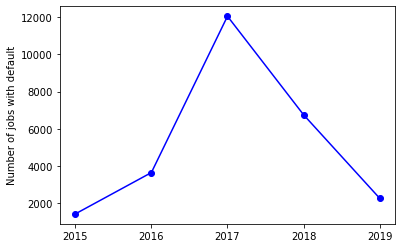

In [44]:
fig,ax = plt.subplots()
ax.plot(['2015','2016','2017','2018','2019'],[1409,3636,12055,6749,2253],'b-o')
ax.set_ylabel("Number of jobs with default")
plt.savefig("default count.png")

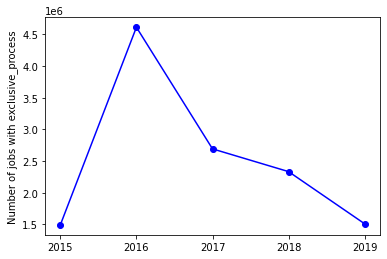

In [45]:
fig,ax = plt.subplots()
ax.plot(['2015','2016','2017','2018','2019'],[1490669,4613357,2691918,2332517,1508066],'b-o')
ax.set_ylabel("Number of jobs with exclusive_process")
plt.savefig("excl count.png")

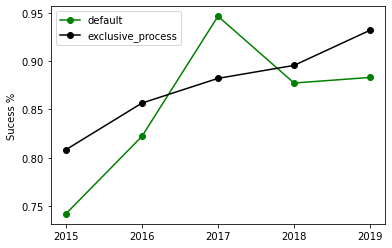

In [55]:
fig,ax = plt.subplots()
ax.plot(['2015','2016','2017','2018','2019'],[0.7416607523066004,0.8220572057205721,0.946744089589382,
0.8774633279004297,0.8832667554371949],'g-o')

ax.plot(['2015','2016','2017','2018','2019'],[0.8081981982586343,0.8566232788834681,0.882291733997841,
0.8957632463128886,0.9322847939015931],'k-o')
ax.legend(['default','exclusive_process'])
ax.set_ylabel("Sucess %")
plt.savefig("% succ of gpu_mode.png")

In [13]:
print(s2015.groupby('gpu_mode').agg('count')['user_id'])
print(s2016.groupby('gpu_mode').agg('count')['user_id'])
print(s2017.groupby('gpu_mode').agg('count')['user_id'])
print(s2018.groupby('gpu_mode').agg('count')['user_id'])
print(s2019.groupby('gpu_mode').agg('count')['user_id'])
print('------------------------')
u = s2015[s2015.gpu_mode == 'default']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2016[s2016.gpu_mode == 'default']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2017[s2017.gpu_mode == 'default']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2018[s2018.gpu_mode == 'default']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2019[s2019.gpu_mode == 'default']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
print('--------------------------')
u = s2015[s2015.gpu_mode == 'exclusive_process']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2016[s2016.gpu_mode == 'exclusive_process']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2017[s2017.gpu_mode == 'exclusive_process']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2018[s2018.gpu_mode == 'exclusive_process']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2019[s2019.gpu_mode == 'exclusive_process']
print(u[u.alps_exit == 0].shape[0]/u.shape[0])

gpu_mode
default                 1409
exclusive_process    1490669
Name: user_id, dtype: int64
gpu_mode
default                 3636
exclusive_process    4613357
Name: user_id, dtype: int64
gpu_mode
default                12055
exclusive_process    2691918
Name: user_id, dtype: int64
gpu_mode
default                 6749
exclusive_process    2332517
Name: user_id, dtype: int64
gpu_mode
default                 2253
exclusive_process    1508066
Name: user_id, dtype: int64
------------------------
0.7416607523066004
0.8220572057205721
0.946744089589382
0.8774633279004297
0.8832667554371949
--------------------------
0.8081981982586343
0.8566232788834681
0.882291733997841
0.8957632463128886
0.9322847939015931


## Success of jobs grouped by Science

In [86]:
sci_suc_per = pd.DataFrame()
sci_suc_per['Sciences'] = sorted(s2015['Science'].unique()[1:])

sci_mean = s2015.groupby('Science').agg('mean')
suc_task_sci = []
for i in sorted(s2015['Science'].unique()[1:]):
    temp = s2015[s2015.Science == i][['alps_exit']]
    suc_task_sci.append(temp[temp.alps_exit == 0].shape[0]/temp.shape[0])
sci_suc_per['2015'] = suc_task_sci
    
sci_mean = s2017.groupby('Science').agg('mean')
suc_task_sci = []
for i in sorted(s2017['Science'].unique()[1:]):
    temp = s2017[s2017.Science == i][['alps_exit']]
    suc_task_sci.append(temp[temp.alps_exit == 0].shape[0]/temp.shape[0])
sci_suc_per['2017'] = suc_task_sci
    
sci_mean = s2018.groupby('Science').agg('mean')
suc_task_sci = []
for i in sorted(s2018['Science'].unique()[1:]):
    temp = s2018[s2018.Science == i][['alps_exit']]
    suc_task_sci.append(temp[temp.alps_exit == 0].shape[0]/temp.shape[0])
sci_suc_per['2018'] = suc_task_sci
    
sci_mean = s2019.groupby('Science').agg('mean')
suc_task_sci = []
for i in sorted(s2019['Science'].unique()[1:]):
    temp = s2019[s2019.Science == i][['alps_exit']]
    suc_task_sci.append(temp[temp.alps_exit == 0].shape[0]/temp.shape[0])
sci_suc_per['2019'] = suc_task_sci

In [40]:
sci_mean = s2016.groupby('Science').agg('mean')
suc_task_sci = []
sci = ['Biology', 'Computer Science', 'Materials', 'Physics',
       'Engineering', 'Earth Science', 'Nuclear Energy', 'Fusion']
for i in sorted(sci):
    temp = s2016[s2016.Science == i][['alps_exit']]
    suc_task_sci.append(temp[temp.alps_exit == 0].shape[0]/temp.shape[0])

In [43]:
suc_task_sci

[0.509729922431067,
 0.9339288628340429,
 0.9338041607881195,
 0.6839021027231988,
 0.8660448501686843,
 0.8434777844737852,
 0.7956421875969955,
 0.7066674719168982]

In [87]:
sci_suc_per

,Sciences,2015,2017,2018,2019
0,Biology,0.623770,0.508571,0.821621,0.696151
1,Chemistry,0.580000,0.427397,0.513151,0.893640
2,Computer Science,0.917395,0.977310,0.896700,0.973998
3,Earth Science,0.900473,0.871203,0.953223,0.982362
4,Engineering,0.629472,0.797478,0.888560,0.955143
5,Fusion,0.952616,0.802447,0.959799,0.961538
6,Materials,0.599947,0.950353,0.926900,0.889561
7,Nuclear Energy,0.591513,0.738837,0.689304,1.000000
8,Physics,0.934632,0.353537,0.600000,0.678862


## Stats for file systems

In [46]:
file_system = pd.DataFrame()
file_system['Types'] = ['NA','atlas','atlas1','atlas2']
file_system['2015'] = s2015.groupby('file_system').agg('count')['user_id'].values
file_system['2016'] = s2016.groupby('file_system').agg('count')['user_id'].values
file_system['2018'] = s2018.groupby('file_system').agg('count')['user_id'].values
file_system['2019'] = s2019.groupby('file_system').agg('count')['user_id'].values
file_system['2017'] = [1411603,236347,14798,1040971]
file_system = file_system.append(pd.DataFrame({'Types' : ['atlas1_thin'],'2015':[0],'2016':[0],'2018':[0],
                                 '2019':[0],'2017':[254]}))

In [47]:
file_system

,Types,2015,2016,2018,2019,2017
0,NA,895928,3359842,1737693,1229140,1411603
1,atlas,404999,430762,317594,149803,236347
2,atlas1,25940,30626,42193,9810,14798
3,atlas2,165211,795763,241786,121566,1040971
0,atlas1_thin,0,0,0,0,254


In [18]:
atlas = []
u = s2015[s2015.file_system == 'atlas']
atlas.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2016[s2016.file_system == 'atlas']
atlas.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2017[s2017.file_system == 'atlas']
atlas.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2018[s2018.file_system == 'atlas']
atlas.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2019[s2019.file_system == 'atlas']
atlas.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

In [19]:
atlas1 = []

u = s2015[s2015.file_system == 'atlas1']
atlas1.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2016[s2016.file_system == 'atlas1']
atlas1.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2017[s2017.file_system == 'atlas1']
atlas1.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2018[s2018.file_system == 'atlas1']
atlas1.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2019[s2019.file_system == 'atlas1']
atlas1.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

In [20]:
atlas2 = []

u = s2015[s2015.file_system == 'atlas2']
atlas2.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2016[s2016.file_system == 'atlas2']
atlas2.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2017[s2017.file_system == 'atlas2']
atlas2.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2018[s2018.file_system == 'atlas2']
atlas2.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

u = s2019[s2019.file_system == 'atlas2']
atlas2.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

In [21]:
NA = []
u = s2015[s2015.file_system == 'NA']
NA.append(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2016[s2016.file_system == 'NA']
NA.append(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2017[s2017.file_system == 'NA']
NA.append(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2018[s2018.file_system == 'NA']
NA.append(u[u.alps_exit == 0].shape[0]/u.shape[0])
u = s2019[s2019.file_system == 'NA']
NA.append(u[u.alps_exit == 0].shape[0]/u.shape[0])

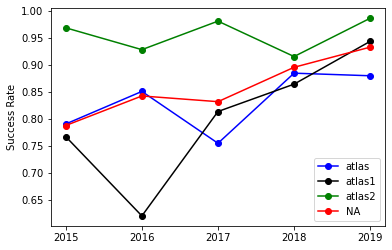

In [25]:
fig,ax = plt.subplots()
ax.plot(['2015','2016','2017','2018','2019'],atlas,'b-o')
ax.plot(['2015','2016','2017','2018','2019'],atlas1,'k-o')
ax.plot(['2015','2016','2017','2018','2019'],atlas2,'g-o')
ax.plot(['2015','2016','2017','2018','2019'],NA,'r-o')
ax.legend(['atlas','atlas1','atlas2','NA'])
ax.set_ylabel("Success Rate")
plt.savefig('file_system.png')

## Stats based on job percentiles

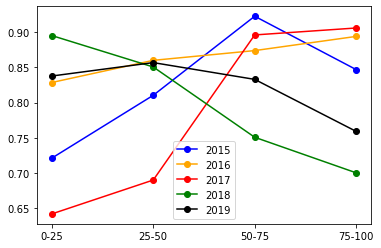

In [41]:
fig,ax = plt.subplots()
ax.plot(['0-25','25-50','50-75','75-100'],[len(t25_15['user_id'].unique())/len(s2015['user_id'].unique()),
                                              len(t50_15['user_id'].unique())/len(s2015['user_id'].unique())
                                          ,len(t75_15['user_id'].unique())/len(s2015['user_id'].unique()),
                                              len(t100_15['user_id'].unique())/len(s2015['user_id'].unique())],'b-o')

ax.plot(['0-25','25-50','50-75','75-100'],[len(t25_16['user_id'].unique())/len(s2016['user_id'].unique()),
                                              len(t50_16['user_id'].unique())/len(s2016['user_id'].unique())
                                          ,len(t75_16['user_id'].unique())/len(s2016['user_id'].unique()),
                                              len(t100_16['user_id'].unique())/len(s2016['user_id'].unique())],'m-o',color ="orange")

ax.plot(['0-25','25-50','50-75','75-100'],[len(t25_17['user_id'].unique())/len(s2017['user_id'].unique()),
                                              len(t50_17['user_id'].unique())/len(s2017['user_id'].unique())
                                          ,len(t75_17['user_id'].unique())/len(s2017['user_id'].unique()),
                                              len(t100_17['user_id'].unique())/len(s2017['user_id'].unique())],'r-o',color="red")

ax.plot(['0-25','25-50','50-75','75-100'],[len(t25_18['user_id'].unique())/len(s2018['user_id'].unique()),
                                              len(t50_18['user_id'].unique())/len(s2018['user_id'].unique())
                                          ,len(t75_18['user_id'].unique())/len(s2018['user_id'].unique()),
                                              len(t100_18['user_id'].unique())/len(s2018['user_id'].unique())],'g-o',color ="green")

ax.plot(['0-25','25-50','50-75','75-100'],[len(t25_19['user_id'].unique())/len(s2019['user_id'].unique()),
                                              len(t50_19['user_id'].unique())/len(s2019['user_id'].unique())
                                          ,len(t75_19['user_id'].unique())/len(s2019['user_id'].unique()),
                                              len(t100_19['user_id'].unique())/len(s2019['user_id'].unique())],'k-o',color="black")

labels = ["2015","2016",'2017','2018','2019']
ax.legend(labels = labels,loc = 8)
plt.savefig('quartile_user_per.png')

### Failed jobs in each percentile

In [14]:
fail_25_15 = t25_15[t25_15.alps_exit != 0]
fail_50_15 = t50_15[t50_15.alps_exit != 0]
fail_75_15 = t75_15[t75_15.alps_exit != 0]
fail_100_15 = t100_15[t100_15.alps_exit != 0]

fail_25_16 = t25_16[t25_16.alps_exit != 0]
fail_50_16 = t50_16[t50_16.alps_exit != 0]
fail_75_16 = t75_16[t75_16.alps_exit != 0]
fail_100_16 = t100_16[t100_16.alps_exit != 0]

fail_25_17 = t25_17[t25_17.alps_exit != 0]
fail_50_17 = t50_17[t50_17.alps_exit != 0]
fail_75_17 = t75_17[t75_17.alps_exit != 0]
fail_100_17 = t100_17[t100_17.alps_exit != 0]

fail_25_18 = t25_18[t25_18.alps_exit != 0]
fail_50_18 = t50_18[t50_18.alps_exit != 0]
fail_75_18 = t75_18[t75_18.alps_exit != 0]
fail_100_18 = t100_18[t100_18.alps_exit != 0]

fail_25_19 = t25_19[t25_19.alps_exit != 0]
fail_50_19 = t50_19[t50_19.alps_exit != 0]
fail_75_19 = t75_19[t75_19.alps_exit != 0]
fail_100_19 = t100_19[t100_19.alps_exit != 0]

In [12]:
print(t25_15['sorf'].mean())
print(t50_15['sorf'].mean())
print(t75_15['sorf'].mean())
print(t100_15['sorf'].mean())

0.9366854181909777
0.756876421985391
0.7977408157833269
0.7206358228082264


### Science job counts and failed jobs in each percentile

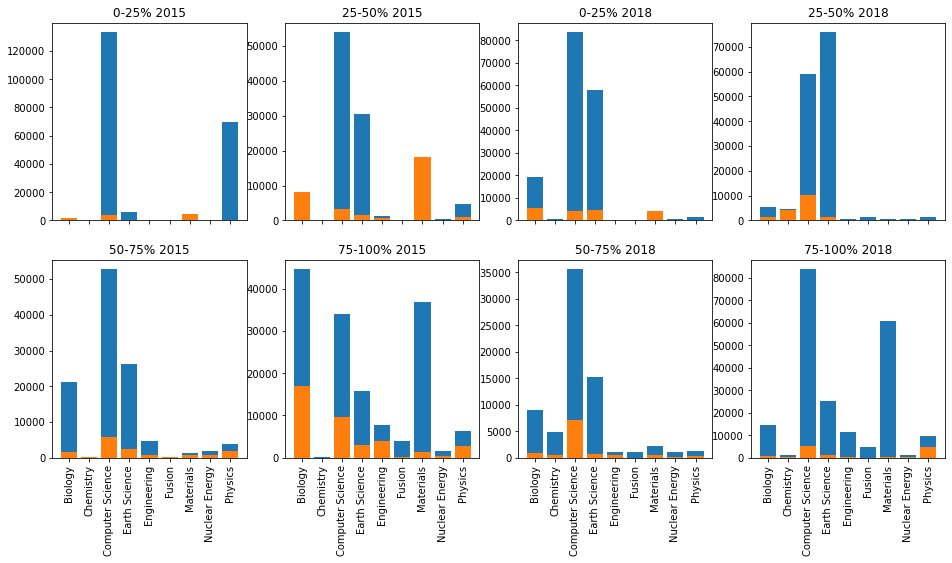

In [19]:
fig,ax = plt.subplots(2,4,figsize = (16,8),sharex = True,)
ax[0,0].bar(x = t25_15.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t25_15.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,0].bar(x = fail_25_15.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_25_15.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,0].tick_params(axis = 'x',rotation = 90)
ax[0,0].set_title('0-25% 2015')

ax[0,1].bar(x = t50_15.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t50_15.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,1].bar(x = fail_50_15.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_50_15.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,1].tick_params(axis = 'x',rotation = 90)
ax[0,1].set_title('25-50% 2015')

ax[0,2].bar(x = t25_18.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t25_18.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,2].bar(x = fail_25_18.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_25_18.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,2].tick_params(axis = 'x',rotation = 90)
ax[0,2].set_title('0-25% 2018')

ax[0,3].bar(x = t50_18.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t50_18.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,3].bar(x = fail_50_18.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_50_18.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,3].tick_params(axis = 'x',rotation = 90)
ax[0,3].set_title('25-50% 2018')



ax[1,0].bar(x = t75_15.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t75_15.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,0].bar(x = fail_75_15.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_75_15.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,0].tick_params(axis = 'x',rotation = 90)
ax[1,0].set_title('50-75% 2015')

ax[1,1].bar(x = t100_15.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t100_15.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,1].bar(x = fail_100_15.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_100_15.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,1].tick_params(axis = 'x',rotation = 90)
ax[1,1].set_title('75-100% 2015')

ax[1,2].bar(x = t75_18.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t75_18.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,2].bar(x = fail_75_18.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_75_18.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,2].tick_params(axis = 'x',rotation = 90)
ax[1,2].set_title('50-75% 2018')

ax[1,3].bar(x = t100_18.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t100_18.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,3].bar(x = fail_100_18.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_100_18.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,3].tick_params(axis = 'x',rotation = 90)
ax[1,3].set_title('75-100% 2018')
plt.savefig("Scienc1518.png")

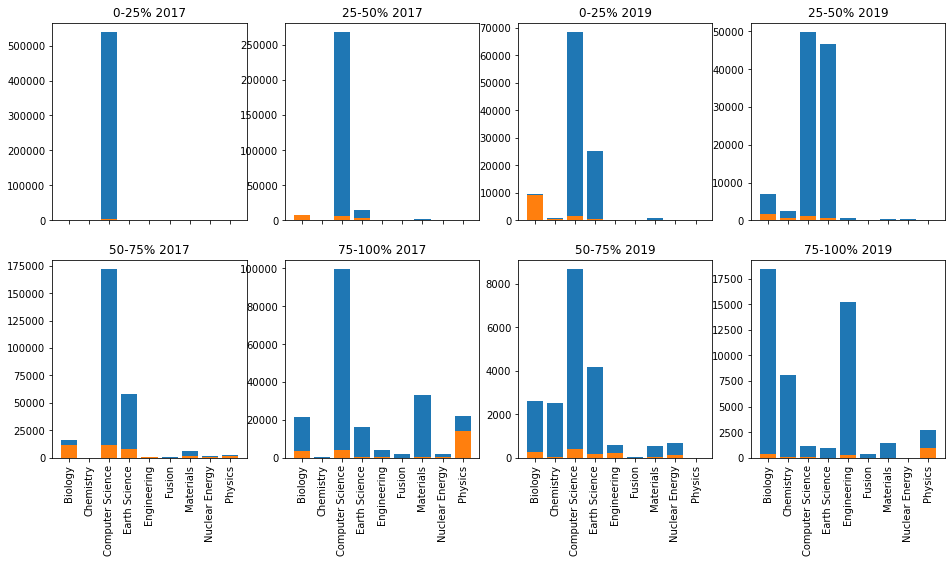

In [20]:
fig,ax = plt.subplots(2,4,figsize = (16,8),sharex = True,)
ax[0,0].bar(x = t25_17.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t25_17.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,0].bar(x = fail_25_17.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_25_17.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,0].tick_params(axis = 'x',rotation = 90)
ax[0,0].set_title('0-25% 2017')

ax[0,1].bar(x = t50_17.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t50_17.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,1].bar(x = fail_50_17.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_50_17.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,1].tick_params(axis = 'x',rotation = 90)
ax[0,1].set_title('25-50% 2017')

ax[0,2].bar(x = t25_19.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t25_19.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,2].bar(x = fail_25_19.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_25_19.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,2].tick_params(axis = 'x',rotation = 90)
ax[0,2].set_title('0-25% 2019')

ax[0,3].bar(x = t50_19.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t50_19.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,3].bar(x = fail_50_19.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_50_19.groupby('Science').agg('count')['user_id'][1:].values)
ax[0,3].tick_params(axis = 'x',rotation = 90)
ax[0,3].set_title('25-50% 2019')



ax[1,0].bar(x = t75_17.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t75_17.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,0].bar(x = fail_75_17.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_75_17.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,0].tick_params(axis = 'x',rotation = 90)
ax[1,0].set_title('50-75% 2017')

ax[1,1].bar(x = t100_17.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t100_17.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,1].bar(x = fail_100_17.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_100_17.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,1].tick_params(axis = 'x',rotation = 90)
ax[1,1].set_title('75-100% 2017')

ax[1,2].bar(x = t75_19.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t75_19.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,2].bar(x = fail_75_19.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_75_19.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,2].tick_params(axis = 'x',rotation = 90)
ax[1,2].set_title('50-75% 2019')

ax[1,3].bar(x = t100_19.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t100_19.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,3].bar(x = fail_100_19.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_100_19.groupby('Science').agg('count')['user_id'][1:].values)
ax[1,3].tick_params(axis = 'x',rotation = 90)
ax[1,3].set_title('75-100% 2019')
plt.savefig("Science1719.png")

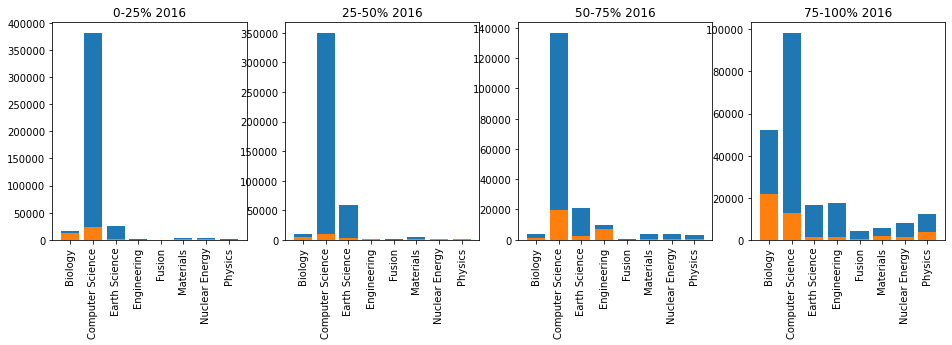

In [25]:
fig,ax = plt.subplots(1,4,figsize = (16,4),sharex = True,)
ax[0].bar(x = t25_16.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t25_16.groupby('Science').agg('count')['user_id'][1:].values)
ax[0].bar(x = fail_25_16.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_25_16.groupby('Science').agg('count')['user_id'][1:].values)
ax[0].tick_params(axis = 'x',rotation = 90)
ax[0].set_title('0-25% 2016')

ax[1].bar(x = t50_16.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t50_16.groupby('Science').agg('count')['user_id'][1:].values)
ax[1].bar(x = fail_50_16.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_50_16.groupby('Science').agg('count')['user_id'][1:].values)
ax[1].tick_params(axis = 'x',rotation = 90)
ax[1].set_title('25-50% 2016')

ax[2].bar(x = t75_16.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t75_16.groupby('Science').agg('count')['user_id'][1:].values)
ax[2].bar(x = fail_75_16.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_75_16.groupby('Science').agg('count')['user_id'][1:].values)
ax[2].tick_params(axis = 'x',rotation = 90)
ax[2].set_title('50-75% 2016')

ax[3].bar(x = t100_16.groupby('Science').agg('count')['user_id'][1:].index,height = 
        t100_16.groupby('Science').agg('count')['user_id'][1:].values)
ax[3].bar(x = fail_100_16.groupby('Science').agg('count')['user_id'][1:].index,height = 
        fail_100_16.groupby('Science').agg('count')['user_id'][1:].values)
ax[3].tick_params(axis = 'x',rotation = 90)
ax[3].set_title('75-100% 2016')
plt.savefig('Science16.png')

### Stats on job parameters

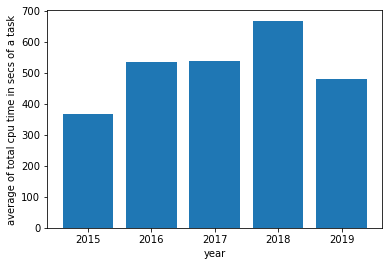

In [21]:
fig,ax = plt.subplots()
x = ['2015','2016','2017','2018','2019']
y = [s2015['ttime'].mean(),s2016['ttime'].mean(),s2017['ttime'].mean(),s2018['ttime'].mean(),s2019['ttime'].mean()]
ax.bar(x = x,height = y)
ax.set_ylabel("average of total cpu time in secs of a task")
ax.set_xlabel("year")
plt.savefig('avg_ttime.png')

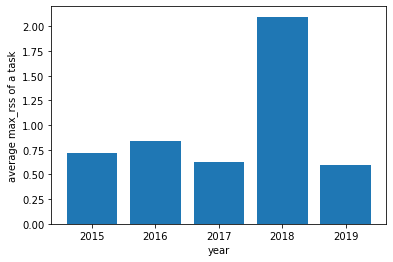

In [19]:
fig,ax = plt.subplots()
x = ['2015','2016','2017','2018','2019']
y = [(s2015['max_rss'].mean()),s2016['max_rss'].mean(),s2017["max_rss"].mean(),
     s2018['max_rss'].mean(),s2019['max_rss'].mean()]
ax.bar(x = x,height = y)
ax.set_ylabel("average max_rss of a task")
ax.set_xlabel("year")
plt.savefig('avg_max_rss')

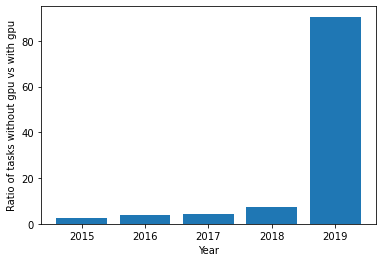

In [40]:
t1 = s2015.groupby("gpu_use_status").agg('count')['user_id']
t2 = s2016.groupby("gpu_use_status").agg('count')['user_id']
t3 = s2017.groupby("gpu_use_status").agg('count')['user_id']
t4 = s2018.groupby("gpu_use_status").agg('count')['user_id']
t5 = s2019.groupby("gpu_use_status").agg('count')['user_id']

fig,ax = plt.subplots()
x = ['2015','2016','2017','2018','2019']
y = [t1[0]/t1[1],t2[0]/t2[1],t3[0]/t3[1],t4[0]/t4[1],t5[0]/t5[1]]
ax.bar(x,y)
ax.set_xlabel("Year")
ax.set_ylabel("Ratio of tasks without gpu vs with gpu")
plt.savefig("with and withou gpu")

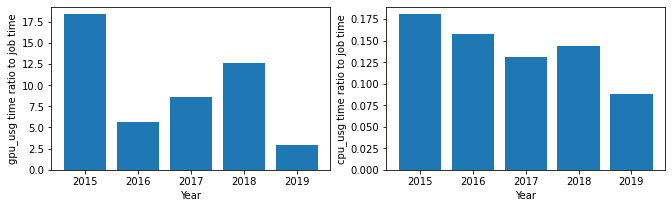

In [23]:
fig,ax = plt.subplots(1,2,figsize = (11,3))
y = [s2015['gpu_usg'].mean(),s2016['gpu_usg'].mean(),s2017['gpu_usg'].mean(),s2018['gpu_usg'].mean(),
     s2019['gpu_usg'].mean()]
x = ['2015','2016','2017','2018','2019']
ax[0].bar(x = x,height = y)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("gpu_usg time ratio to job time")

y = [s2015['app_cpu_usg'].mean(),s2016['app_cpu_usg'].mean(),s2017['app_cpu_usg'].mean(),s2018['app_cpu_usg'].mean(),
     s2019['app_cpu_usg'].mean()]
ax[1].bar(x = x,height = y)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("cpu_usg time ratio to job time")
plt.savefig('gpu_usg_times_ratio.png')

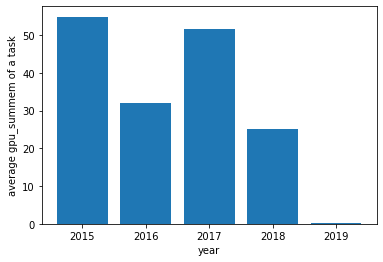

In [44]:
fig,ax = plt.subplots()
x = ['2015','2016','2017','2018','2019']
y = [s2015['gpu_summem'].mean(),s2016['gpu_summem'].mean(),s2017["gpu_summem"].mean(),s2018['gpu_summem'].mean(),s2019['gpu_summem'].mean()]
ax.bar(x = x,height = y)
ax.set_ylabel("average gpu_summem of a task")
ax.set_xlabel("year")
plt.savefig("avg_gpu_sum")

In [26]:
s2016[s2016.gpu_use_status == 0].describe()[['job_time','node_count','ttime','max_rss']]

,job_time,node_count,ttime,max_rss
count,3.650875e+06,3.650875e+06,3.650875e+06,3.650875e+06
mean,5.989054e+02,4.609756e+01,4.158600e+02,4.406135e-01
std,2.896775e+03,4.092970e+02,1.621166e+04,1.266061e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,2.309091e-03,1.194400e-02
50%,2.500000e+01,1.000000e+00,1.633400e-01,1.288240e-01
75%,3.800000e+01,1.500000e+01,1.428587e+00,4.712240e-01
max,1.008380e+05,1.868000e+04,6.980958e+06,3.123941e+01


In [29]:
s2019[s2019.gpu_use_status == 1].describe()[['job_time','node_count','ttime','max_rss']]

,job_time,node_count,ttime,max_rss
count,16496.000000,16496.000000,1.649600e+04,16496.000000
mean,7848.665373,142.123303,2.072029e+03,5.230498
std,14848.334800,1005.723972,5.711380e+04,1.898797
min,1.000000,1.000000,6.727273e-05,0.005516
25%,5194.000000,12.000000,1.130973e+02,5.348250
50%,5226.000000,12.000000,1.139086e+02,5.726670
75%,5264.000000,12.000000,1.153306e+02,5.990255
max,86419.000000,18000.000000,4.151413e+06,30.987172


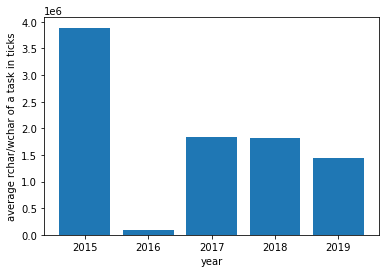

In [33]:
temp1 = s2015[['rchar','wchar']]
temp1 = temp1.dropna()
temp1 = temp1[temp1.wchar != 0]
temp2 = s2017[['rchar','wchar']]
temp2 = temp2.dropna()
temp2 = temp2[temp2.wchar != 0]
temp3 = s2018[['rchar','wchar']]
temp3 = temp3.dropna()
temp3 = temp3[temp3.wchar != 0]
temp4 = s2019[['rchar','wchar']]
temp4 = temp4.dropna()
temp4 = temp4[temp4.wchar != 0]
temp5 = s2016[['rchar','wchar']]
temp5 = temp5.dropna()
temp5 = temp5[temp5.wchar != 0]

fig,ax = plt.subplots()
x = ['2015','2016','2017','2018','2019']
y = [(temp1['rchar']/temp1['wchar']).mean(),(temp5['rchar']/temp5['wchar']).mean(),(temp2["rchar"]/temp2['wchar']).mean(),
     (temp3['rchar']/temp3['wchar']).mean(),(temp4['rchar']/temp4['wchar']).mean()]
ax.bar(x = x,height = y)
ax.set_ylabel("average rchar/wchar of a task in ticks")
ax.set_xlabel("year")
plt.savefig('rcharwchar.png')

## Stats on exit conditions

In [19]:
z1 = s2015.groupby('alps_exit').agg('mean')['node_count']
z2 = s2016.groupby('alps_exit').agg('mean')['node_count']
z3 = s2017.groupby('alps_exit').agg('mean')['node_count']
z4 = s2018.groupby('alps_exit').agg('mean')['node_count']
z5 = s2019.groupby('alps_exit').agg('mean')['node_count']

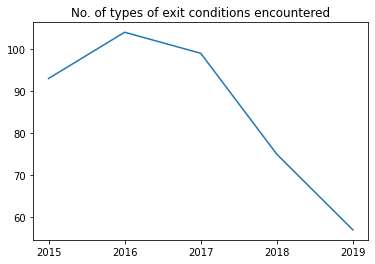

In [49]:
fig,ax = plt.subplots()
ax.plot(pd.Series(data = [z1.shape[0]-1,z2.shape[0]-1,z3.shape[0]-1,z4.shape[0]-1,z5.shape[0]-1],
                  index = ['2015','2016','2017','2018','2019']))
ax.set_title("No. of types of exit conditions encountered")
plt.savefig("Error conditions")

In [17]:
zz1 = z1.sort_values(ascending = False).iloc[:10]
zz2 = z2.sort_values(ascending = False).iloc[:14]
zz3 = z3.sort_values(ascending = False).iloc[:10]
zz4 = z4.sort_values(ascending = False).iloc[:11]
zz5 = z5.sort_values(ascending = False).iloc[:7]

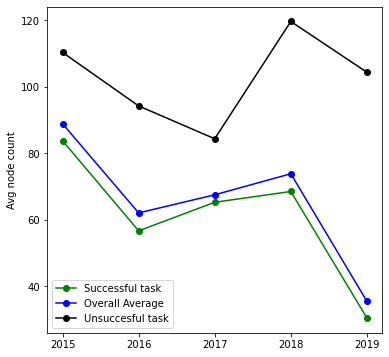

In [68]:
fig,ax = plt.subplots(figsize = (6,6))
l1 = ax.plot(pd.Series(data = [z1[0],z2[0],z3[0],z4[0],z5[0]],
                  index = ['2015','2016','2017','2018','2019']),'g-o')

ax.set_ylabel("Avg node count")

l2 = ax.plot(pd.Series(data = [s2015['node_count'].mean(),s2016['node_count'].mean(),s2017['node_count'].mean(),
                             s2018['node_count'].mean(),s2019['node_count'].mean()],index =
                     ['2015','2016','2017','2018','2019'] ),'b-o')
l3 = ax.plot(pd.Series(data = [s2015[s2015.alps_exit != 0].describe()['node_count'].iloc[1],
                              s2016[s2016.alps_exit != 0].describe()['node_count'].iloc[1],
                              s2017[s2017.alps_exit != 0].describe()['node_count'].iloc[1],
                              s2018[s2018.alps_exit != 0].describe()['node_count'].iloc[1],
                              s2019[s2019.alps_exit != 0].describe()['node_count'].iloc[1]],index = ['2015','2016','2017','2018','2019']),'k-o')

ax.legend(['Successful task','Overall Average','Unsuccesful task'])
plt.savefig('suc_ov_uns.png')

In [18]:
z6 = s2015.groupby('alps_exit').agg('count')['node_count'].sort_values(ascending = False)
z7 = s2016.groupby('alps_exit').agg('count')['node_count'].sort_values(ascending = False)
z8 = s2017.groupby('alps_exit').agg('count')['node_count'].sort_values(ascending = False)
z9 = s2018.groupby('alps_exit').agg('count')['node_count'].sort_values(ascending = False)
z10 = s2019.groupby('alps_exit').agg('count')['node_count'].sort_values(ascending = False)
z6 = z6.iloc[1:11];z7 = z7.iloc[1:11];z8 = z8.iloc[1:11];z9 = z9[1:11];z10 = z10[1:11]

In [35]:
z6.index = list(map(lambda x:str(x),z6.index))
z7.index = list(map(lambda x:str(x),z7.index))
z8.index = list(map(lambda x:str(x),z8.index))
z9.index = list(map(lambda x:str(x),z9.index))
z10.index = list(map(lambda x:str(x),z10.index))

In [20]:
temp_df = pd.DataFrame(z7)
temp_df.rename({'node_count' : 'count'},axis = 1,inplace = True)
temp_df1 = pd.DataFrame(z2)
temp_df['exit'] = temp_df.index
temp_df1['exit'] = temp_df1.index
temp_df = temp_df.merge(temp_df1,how = "left",on = 'exit')
temp_df['exit'] = temp_df[['exit']].astype('string',copy = False)['exit'].values

In [21]:
temp_df

,count,exit,node_count
0,203267,127,7.900018
1,189652,137,271.653829
2,101669,1,16.069146
3,79016,143,53.909272
4,56014,134,13.912915
5,11314,130,58.753226
6,8186,139,64.636575
7,5311,255,211.483525
8,1673,2,19.406455
9,567,174,125.730159


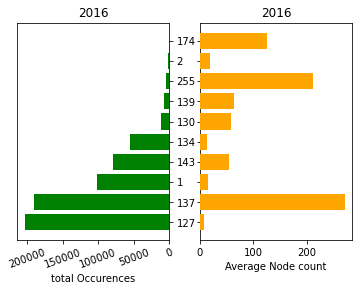

In [23]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y = temp_df['exit'].iloc[0:10],width = temp_df['count'].iloc[0:10], align='center', color='green', zorder=10)
axes[0].set(title='2016')
axes[1].barh(y = temp_df['exit'].iloc[0:10],width = temp_df['node_count'].iloc[0:10], align='center', color='orange', zorder=10)
axes[1].set_xlabel("Average Node count")
axes[1].set(title='2016')
axes[0].set_xlabel("total Occurences")
axes[0].tick_params(axis = 'x',rotation = 20)

axes[0].invert_xaxis()
axes[0].set(yticks=temp_df['exit'].iloc[0:10], yticklabels=temp_df['exit'].iloc[0:10])
axes[0].yaxis.tick_right()
plt.savefig('2016errors.png')

## User wise stats

In [87]:
avg_succ_15 = []
avg_succ_16 = []
avg_succ_17 = []
avg_succ_18 = []
avg_succ_19 = []
for i in s2015.groupby('user_id').agg('count').index:
    asu = s2015[s2015.user_id == i]
    avg_succ_15.append(asu[asu.alps_exit == 0].shape[0]/asu.shape[0])
    
for i in s2016.groupby('user_id').agg('count').index:
    asu = s2016[s2016.user_id == i]
    avg_succ_16.append(asu[asu.alps_exit == 0].shape[0]/asu.shape[0])
    
for i in s2017.groupby('user_id').agg('count').index:
    asu = s2017[s2017.user_id == i]
    avg_succ_17.append(asu[asu.alps_exit == 0].shape[0]/asu.shape[0])
    
for i in s2018.groupby('user_id').agg('count').index:
    asu = s2018[s2018.user_id == i]
    avg_succ_18.append(asu[asu.alps_exit == 0].shape[0]/asu.shape[0])
    
for i in s2019.groupby('user_id').agg('count').index:
    asu = s2019[s2019.user_id == i]
    avg_succ_19.append(asu[asu.alps_exit == 0].shape[0]/asu.shape[0])

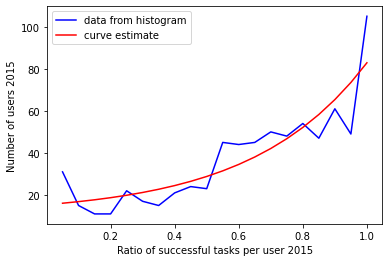

In [88]:
from scipy.optimize import curve_fit
ent,bins = np.histogram(avg_succ_15,bins = 20)
bins = bins[1:]
def fun(x,a,b,c):
    return a * np.exp(b *x) + c
popt5, pcov5 = curve_fit(fun, bins, ent,method = 'lm')
fig,ax = plt.subplots()
ax.plot(bins, ent, 'b-', label='data')
ax.plot(bins, fun(bins, *popt5), 'r-')
ax.set_ylabel("Number of users 2015")
ax.set_xlabel("Ratio of successful tasks per user 2015")
ax.legend(['data from histogram','curve estimate'],loc = 2)
plt.savefig("user15fit.png")

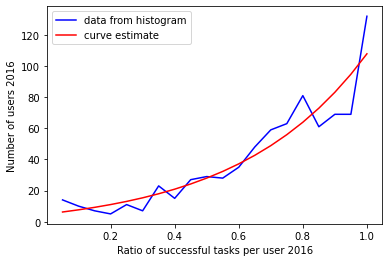

In [89]:
from scipy.optimize import curve_fit
ent,bins = np.histogram(avg_succ_16,bins = 20)
bins = bins[1:]
def fun(x,a,b,c):
    return a * np.exp(b *x) + c
popt6, pcov6 = curve_fit(fun, bins, ent,method = 'lm')
fig,ax = plt.subplots()
ax.plot(bins, ent, 'b-', label='data')
ax.plot(bins, fun(bins, *popt6), 'r-')
ax.set_ylabel("Number of users 2016")
ax.set_xlabel("Ratio of successful tasks per user 2016")
ax.legend(['data from histogram','curve estimate'],loc = 2)
plt.savefig("user16fit.png")

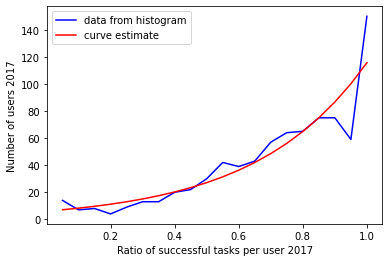

In [90]:
from scipy.optimize import curve_fit
ent,bins = np.histogram(avg_succ_17,bins = 20)
bins = bins[1:]
def fun(x,a,b,c):
    return a * np.exp(b *x) + c
popt7, pcov7 = curve_fit(fun, bins, ent,method = 'lm')
fig,ax = plt.subplots()
ax.plot(bins, ent, 'b-', label='data')
ax.plot(bins, fun(bins, *popt7), 'r-')
ax.set_ylabel("Number of users 2017")
ax.set_xlabel("Ratio of successful tasks per user 2017")
ax.legend(['data from histogram','curve estimate'],loc = 2)
plt.savefig("user17fit.png")

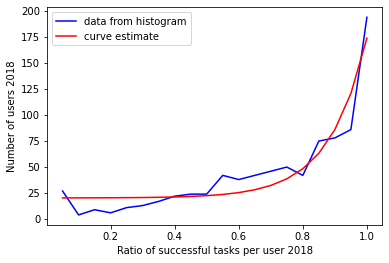

In [91]:
from scipy.optimize import curve_fit
ent,bins = np.histogram(avg_succ_18,bins = 20)
bins = bins[1:]
def fun(x,a,b,c):
    return a * np.exp(b *x) + c
popt8, pcov8 = curve_fit(fun, bins, ent,method = 'lm')
fig,ax = plt.subplots()
ax.plot(bins, ent, 'b-', label='data')
ax.plot(bins, fun(bins, *popt8), 'r-')
ax.set_ylabel("Number of users 2018")
ax.set_xlabel("Ratio of successful tasks per user 2018")
ax.legend(['data from histogram','curve estimate'],loc = 2)
plt.savefig("user18fit.png")

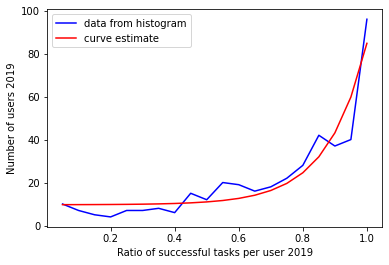

In [92]:
from scipy.optimize import curve_fit
ent,bins = np.histogram(avg_succ_19,bins = 20)
bins = bins[1:]
def fun(x,a,b,c):
    return a * np.exp(b *x) + c
popt9, pcov9 = curve_fit(fun, bins, ent,method = 'lm')
fig,ax = plt.subplots()
ax.plot(bins, ent, 'b-', label='data')
ax.plot(bins, fun(bins, *popt9), 'r-')
ax.set_ylabel("Number of users 2019")
ax.set_xlabel("Ratio of successful tasks per user 2019")
ax.legend(['data from histogram','curve estimate'],loc = 2)
plt.savefig("user19fit.png")

In [97]:
popt9

array([0.02292924, 8.09440205, 9.6689304 ])

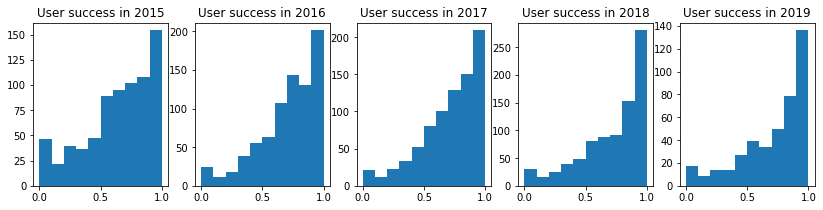

In [17]:
fig,ax = plt.subplots(1,5,figsize = (14,3))
ax[0].hist(avg_succ_15)
ax[1].hist(avg_succ_16)
ax[2].hist(avg_succ_17)
ax[3].hist(avg_succ_18)
ax[4].hist(avg_succ_19)
ax[0].set_title('User success in 2015')
ax[1].set_title('User success in 2016')
ax[2].set_title('User success in 2017')
ax[3].set_title('User success in 2018')
ax[4].set_title('User success in 2019')
plt.savefig("user_suc_yearly.png")

## Relation check between cpu usage, gpu usage and nodes

In [59]:
s2015[['alps_width','node_count','gpu_summem','gpu_secs','gpu_maxmem','ttime']].corr()

,alps_width,node_count,gpu_summem,gpu_secs,gpu_maxmem,ttime
alps_width,1.000000,0.581745,0.326717,0.126750,0.015912,0.145457
node_count,0.581745,1.000000,0.479592,0.158822,0.051449,0.137631
gpu_summem,0.326717,0.479592,1.000000,0.220610,0.149257,0.157123
gpu_secs,0.126750,0.158822,0.220610,1.000000,0.046725,0.281376
gpu_maxmem,0.015912,0.051449,0.149257,0.046725,1.000000,0.013722
ttime,0.145457,0.137631,0.157123,0.281376,0.013722,1.000000


In [13]:
y5 = s2015[s2015.gpu_use_status == 1]
y6 = s2016[s2016.gpu_use_status == 1]
y7 = s2017[s2017.gpu_use_status == 1]
y8 = s2018[s2018.gpu_use_status == 1]
y9 = s2019[s2019.gpu_use_status == 1]

### Node count and gpu relation

In [26]:
from scipy.stats import pearsonr
print(pearsonr(x = np.array(np.log(y5['node_count'])),y = np.log(y5['gpu_summem'])))
print(pearsonr(x = np.array(np.log(y6['node_count'])),y = np.log(y6['gpu_summem'])))
print(pearsonr(x = np.array(np.log(y7['node_count'])),y = np.log(y7['gpu_summem'])))
print(pearsonr(x = np.array(np.log(y8['node_count'])),y = np.log(y8['gpu_summem'])))
print(pearsonr(x = np.array(np.log(y9['node_count'])),y = np.log(y9['gpu_summem'])))

(0.867709355226254, 0.0)
(0.8724590857053647, 0.0)
(0.8894579373504763, 0.0)
(0.8895804755116906, 0.0)
(0.4675810876274633, 0.0)


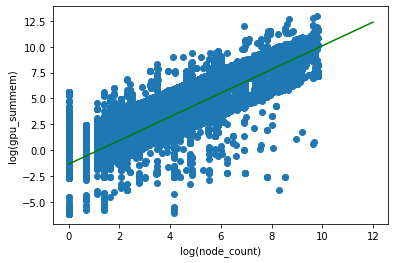

In [31]:
fig,ax = plt.subplots()
ax.scatter(x = np.log(y7['node_count']), y = np.log(y7['gpu_summem']))
ax.plot([0,2,5,10,12],[lr.predict(np.array([0]).reshape(-1,1)),lr.predict(np.array([2]).reshape(-1,1)),
                          lr.predict(np.array([5]).reshape(-1,1)),lr.predict(np.array([10]).reshape(-1,1)),
                       lr.predict(np.array([12]).reshape(-1,1))],'g')
ax.set_xlabel("log(node_count)")
ax.set_ylabel("log(gpu_summem)")
plt.savefig('ncVSloggpu17')

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X = np.array(np.log(y7['node_count'])).reshape(-1,1),y = np.log(y7['gpu_summem']))
lr.coef_

array([1.14363901])

In [28]:
print(lr.score(X = np.array(np.log(y6['node_count'])).reshape(-1,1),y = np.log(y6['gpu_summem'])))
print(lr.score(X = np.array(np.log(y5['node_count'])).reshape(-1,1),y = np.log(y5['gpu_summem'])))
print(lr.score(X = np.array(np.log(y8['node_count'])).reshape(-1,1),y = np.log(y8['gpu_summem'])))
print(lr.score(X = np.array(np.log(y9['node_count'])).reshape(-1,1),y = np.log(y9['gpu_summem'])))

0.7474172230504782
0.7433150811039424
0.7648412148811574
-0.47681376156017197


### cpu total time and gpu total time

In [28]:
print(y5[['ttime','gpu_secs']].corr().iloc[0,1])
print(y6[['ttime','gpu_secs']].corr().iloc[0,1])
print(y7[['ttime','gpu_secs']].corr().iloc[0,1])
print(y8[['ttime','gpu_secs']].corr().iloc[0,1])
print(y9[['ttime','gpu_secs']].corr().iloc[0,1])

0.3406982609061076
0.4745873446641683
0.39019585787526573
0.25357659319914666
0.5293801611401278


In [57]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X = np.array(y5[y5.gpu_secs != 0]['ttime']).reshape(-1,1),y = y5[y5.gpu_secs != 0]['gpu_secs'])
lr1.coef_

array([46.89470422])

In [74]:
from sklearn.linear_model import TweedieRegressor
gr1 = TweedieRegressor(power = 0)
gr1.fit(X = np.array(y5[y5.gpu_secs != 0]['ttime']).reshape(-1,1),y = y5[y5.gpu_secs != 0]['gpu_secs'])

TweedieRegressor(power=0)

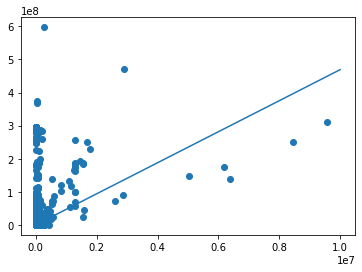

In [58]:
plt.scatter(y5['ttime'],y5['gpu_secs'])
plt.plot([0,1000000,10000000],[lr1.predict(np.array([0]).reshape(-1,1))
                            ,lr1.predict(np.array([1000000]).reshape(-1,1)),
                             lr1.predict(np.array([10000000]).reshape(-1,1))])

In [72]:
print(lr1.score(X = np.array(y6[y6.gpu_secs != 0]['ttime']).reshape(-1,1),y = y6[y6.gpu_secs != 0]['gpu_secs']))
print(lr1.score(X = np.array(y7[y7.gpu_secs != 0]['ttime']).reshape(-1,1),y = y7[y7.gpu_secs != 0]['gpu_secs']))
print(lr1.score(X = np.array(y8[y8.gpu_secs != 0]['ttime']).reshape(-1,1),y = y8[y8.gpu_secs != 0]['gpu_secs']))
print(lr1.score(X = np.array(y9[y9.gpu_secs != 0]['ttime']).reshape(-1,1),y = y9[y9.gpu_secs != 0]['gpu_secs']))

0.21894047833701424
0.12590885348301706
-0.007779057619600849
0.16545154158581654


### Max CPU memory and max GPU memory

In [24]:
print(y5[['max_rss','gpu_maxmem']].corr().iloc[0,1])
print(y6[['max_rss','gpu_maxmem']].corr().iloc[0,1])
print(y7[['max_rss','gpu_maxmem']].corr().iloc[0,1])
print(y8[['max_rss','gpu_maxmem']].corr().iloc[0,1])
print(y9[['max_rss','gpu_maxmem']].corr().iloc[0,1])

0.6202209595582265
0.5610274183893199
0.6258637761460748
0.5811884577609365
-0.045575503968985784


In [76]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X = np.array(y5['max_rss']).reshape(-1,1),y = y5['gpu_maxmem'])
lr2.coef_

array([0.25558361])

In [79]:
print(lr2.score(X = np.array(y6['max_rss']).reshape(-1,1),y = y6['gpu_maxmem']))
print(lr2.score(X = np.array(y7['max_rss']).reshape(-1,1),y = y7['gpu_maxmem']))
print(lr2.score(X = np.array(y8['max_rss']).reshape(-1,1),y = y8['gpu_maxmem']))
print(lr2.score(X = np.array(y9['max_rss']).reshape(-1,1),y = y9['gpu_maxmem']))

0.3057947852334978
0.3726908794996183
0.32698574394184665
-8.201740123245271


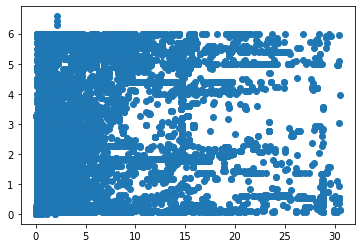

In [35]:
plt.scatter(y5['max_rss'],y5['gpu_maxmem'])

### CPU total time and gpu summem

In [29]:
from scipy.stats import pearsonr

print(pearsonr(x = np.array(np.log(y5[y5.ttime != 0]['ttime'])),y = np.log(y5[y5.ttime != 0]['gpu_summem'])))
print(pearsonr(x = np.array(np.log(y6[y6.ttime != 0]['ttime'])),y = np.log(y6[y6.ttime != 0]['gpu_summem'])))
print(pearsonr(x = np.array(np.log(y7[y7.ttime != 0]['ttime'])),y = np.log(y7[y7.ttime != 0]['gpu_summem'])))
print(pearsonr(x = np.array(np.log(y8[y8.ttime != 0]['ttime'])),y = np.log(y8[y8.ttime != 0]['gpu_summem'])))
print(pearsonr(x = np.array(np.log(y9[y9.ttime != 0]['ttime'])),y = np.log(y9[y9.ttime != 0]['gpu_summem'])))

(0.6130570303070638, 0.0)
(0.7073830502012475, 0.0)
(0.5578042367537475, 0.0)
(0.4774233607978905, 0.0)
(0.6911163468057543, 0.0)


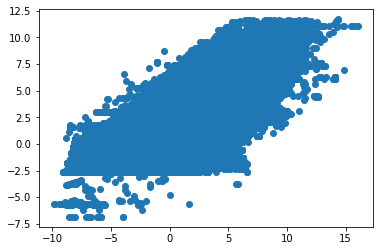

In [82]:
plt.scatter(np.array(np.log(y5[y5.ttime != 0]['ttime'])),np.log(y5[y5.ttime != 0]['gpu_summem']))

In [83]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()
lr3.fit(X = np.array(np.log(y5[y5.ttime != 0]['ttime'])).reshape(-1,1),y = np.log(y5[y5.ttime != 0]['gpu_summem']))
lr3.coef_

array([0.32800976])

In [85]:
print(lr3.score(X = np.array(np.log(y6[y6.ttime != 0]['ttime'])).reshape(-1,1),y = np.log(y6[y6.ttime != 0]['gpu_summem'])))
print(lr3.score(X = np.array(np.log(y7[y7.ttime != 0]['ttime'])).reshape(-1,1),y = np.log(y7[y7.ttime != 0]['gpu_summem'])))
print(lr3.score(X = np.array(np.log(y8[y8.ttime != 0]['ttime'])).reshape(-1,1),y = np.log(y8[y8.ttime != 0]['gpu_summem'])))
print(lr3.score(X = np.array(np.log(y9[y9.ttime != 0]['ttime'])).reshape(-1,1),y = np.log(y9[y9.ttime != 0]['gpu_summem'])))

0.4956867919584891
0.29811118358843447
0.2085322795236929
-0.9120680631352533


## Max_rss, Gpu_summem Vs node_count

In [38]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()
lr3.fit(X = np.log(y5[['max_rss','gpu_summem']]),y = np.log(y5['node_count']))
lr3.coef_

array([-0.48460657,  0.85956711])

In [14]:
print(lr3.score(X = np.log(y7[['max_rss','gpu_summem']]),y = np.log(y7['node_count'])))

0.8440939042646866


In [70]:
lr3.predict(np.array([[-5,-7]]))

array([-2.92583344])

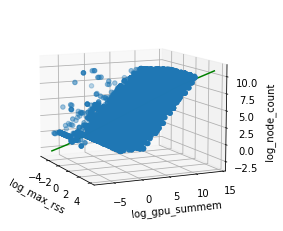

In [73]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',elev = 10,azim = -25)
ax.scatter(xs = np.log(y5['max_rss']).values,ys = np.log(y5['gpu_summem']).values,
            zs = np.log(y5['node_count']).values)
ax.plot(xs = [-5,-4,-2,-0,2,4],ys = [-7,-5,0,5,10,14],zs = [-2.9,-1.69,1.63,4.96,8.29,10.76],c = 'g')
ax.set_xlabel('log_max_rss')
ax.set_ylabel('log_gpu_summem')
ax.set_zlabel('log_node_count')
plt.savefig("3way.png")